In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import requests
import re

# Google API Key
from config_FY import gKey

## Read data

In [2]:
listing_state = "CA"

glassdoor_df = pd.read_csv("../Data/glassdoor_data_science.csv")
monster_df = pd.read_csv("../Data/monster_data_science.csv")
careerbuilder_df = pd.read_csv("../Data/careerbuilder_data_science.csv")
indeed_df = pd.read_csv("../Data/indeed_data_science.csv")

## Merge Data, count and drop duplicates

In [3]:
# Concatenate 
job_listings = pd.concat([glassdoor_df, monster_df, careerbuilder_df, indeed_df], axis=0, sort=True)
job_listings.reset_index(inplace=True, drop=True)
# Remove NaN
job_listings.dropna()

,City,Company,Description,Keyword,Location,Salary,Site,State,Title,URL,Unnamed: 0
0,Santa Clara,Akamai,About the Job\r\n\r\nIf you have a deep passio...,Data Scientist,"Santa Clara, CA",$129k-$180k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,0
1,San Diego,"MINDBODY, Inc","Data Scientists focus on extracting, understan...",Data Scientist,"San Diego, CA",$75k-$108k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,1
2,Foster City,Visa Inc.,"Common Purpose, Uncommon Opportunity. Everyone...",Data Scientist,"Foster City, CA",$162k-$220k(Glassdoor Est.),Glassdoor,CA,Data Scientist / Sr. Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,2
3,San Francisco,Zynga,Position Overview\r\n\r\nThe data scientist wi...,Data Scientist,"San Francisco, CA",$138k-$190k(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Marketing Analytics",https://www.glassdoor.com/partner/jobListing.h...,3
4,San Francisco,Slack,Slack is looking for experienced analysts to j...,Data Scientist,"San Francisco, CA",$124k-$173k(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Analytics",https://www.glassdoor.com/partner/jobListing.h...,4
5,San Diego,Experian,Experian DataLabs is a R&D unit at Experian fo...,Data Scientist,"San Diego, CA",$121k-$169k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,5
6,San Francisco,DoorDash,The Analytics team is looking for Data Scienti...,Data Scientist,"San Francisco, CA",$101k-$141k(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Analytics",https://www.glassdoor.com/partner/jobListing.h...,6
7,Redlands,Esri,Overview\r\nAre you passionate about changing ...,Data Scientist,"Redlands, CA",$93k-$132k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,7
8,Costa Mesa,Hart,Hart is a medical software company utilizing t...,Data Scientist,"Costa Mesa, CA",$129k-$146k(Glassdoor Est.),Glassdoor,CA,"Data Engineer, Python",https://www.glassdoor.com/partner/jobListing.h...,8
9,Santa Clara,Akamai,Overview\r\n\r\nAkamai’s security business is ...,Data Scientist,"Santa Clara, CA",$151k-$210k(Glassdoor Est.),Glassdoor,CA,Senior Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,9


In [4]:
# Calculate listing counts by site
count_by_site = job_listings["Site"].value_counts()
count_by_site_df = pd.DataFrame(count_by_site)
#count_by_site = count_by_site.reset_index()
count_by_site_df.columns = ["Job Site"]
#count_by_site
count_by_site_df

,Job Site
Indeed,814
Glassdoor,650
CareerBuilder,207
Monster,173


## Clean "State" Column

In [5]:
# Extra only the state abbreviation, remove unnessary info such as zip code

# Delete rows where "CA" is not in State

# Loop through each row of job_listings & collect indexes of the bad rows
bad_rows = []
for index, row in job_listings.iterrows():
    # if string does not contain string "CA"
    if "CA" not in str(row["State"]):
        bad_rows.append(index)

# bad_rows

# Delect rows by index
for index in bad_rows:
    job_listings = job_listings.drop([index])

# Check result   
#job_listings["State"].value_counts()

# Split "State"
job_listings["State"] = job_listings["State"].str.split(" ", expand=True)[1]

In [6]:
# Check
job_listings["State"].value_counts()

CA    1813
Name: State, dtype: int64

In [7]:
# Drop duplicates by City, State and Title

job_listings.drop_duplicates(subset=["City", "State", "Title"], inplace=True)
job_listings.reset_index(inplace=True, drop=True)
job_listings

,City,Company,Description,Keyword,Location,Salary,Site,State,Title,URL,Unnamed: 0
0,Santa Clara,Akamai,About the Job\r\n\r\nIf you have a deep passio...,Data Scientist,"Santa Clara, CA",$129k-$180k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,0
1,San Diego,"MINDBODY, Inc","Data Scientists focus on extracting, understan...",Data Scientist,"San Diego, CA",$75k-$108k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,1
2,Foster City,Visa Inc.,"Common Purpose, Uncommon Opportunity. Everyone...",Data Scientist,"Foster City, CA",$162k-$220k(Glassdoor Est.),Glassdoor,CA,Data Scientist / Sr. Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,2
3,San Francisco,Zynga,Position Overview\r\n\r\nThe data scientist wi...,Data Scientist,"San Francisco, CA",$138k-$190k(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Marketing Analytics",https://www.glassdoor.com/partner/jobListing.h...,3
4,San Francisco,Slack,Slack is looking for experienced analysts to j...,Data Scientist,"San Francisco, CA",$124k-$173k(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Analytics",https://www.glassdoor.com/partner/jobListing.h...,4
5,Redlands,Esri,Overview\r\nAre you passionate about changing ...,Data Scientist,"Redlands, CA",$93k-$132k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,7
6,Costa Mesa,Hart,Hart is a medical software company utilizing t...,Data Scientist,"Costa Mesa, CA",$129k-$146k(Glassdoor Est.),Glassdoor,CA,"Data Engineer, Python",https://www.glassdoor.com/partner/jobListing.h...,8
7,Santa Clara,Akamai,Overview\r\n\r\nAkamai’s security business is ...,Data Scientist,"Santa Clara, CA",$151k-$210k(Glassdoor Est.),Glassdoor,CA,Senior Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,9
8,Irvine,Skyworks,\r\n\r\nIf you are looking for a challenging ...,Data Scientist,"Irvine, CA",$107k-$159k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,10
9,San Mateo,avenuecode.com,Avenue Code is the leading software consultanc...,Data Scientist,"San Mateo, CA",$112k-$155k(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,11


In [8]:
# Calculate listing counts by city
count_by_city = pd.DataFrame(job_listings['City'].value_counts())
count_by_city = count_by_city.reset_index()
count_by_city.columns = ["City", "Data Science Jobs"]
count_by_city

,City,Data Science Jobs
0,San Francisco,285
1,San Diego,73
2,San Jose,60
3,Sunnyvale,49
4,Los Angeles,48
5,Mountain View,47
6,Santa Clara,47
7,Palo Alto,46
8,Menlo Park,43
9,Redwood City,37


In [9]:
top10_cities = count_by_city.head(11)["City"].tolist()
top10_cities

['San Francisco',
 'San Diego',
 'San Jose',
 'Sunnyvale',
 'Los Angeles',
 'Mountain View',
 'Santa Clara',
 'Palo Alto',
 'Menlo Park',
 'Redwood City',
 'San Juan Capistrano']

## Clean "Salary" Column

In [11]:
# Clean Salary

# Remove formatting and extract only number

job_listings.loc[job_listings['Site']=="Glassdoor"]['Salary']

0            $129k-$180k(Glassdoor Est.)
1             $75k-$108k(Glassdoor Est.)
2            $162k-$220k(Glassdoor Est.)
3            $138k-$190k(Glassdoor Est.)
4            $124k-$173k(Glassdoor Est.)
5             $93k-$132k(Glassdoor Est.)
6            $129k-$146k(Glassdoor Est.)
7            $151k-$210k(Glassdoor Est.)
8            $107k-$159k(Glassdoor Est.)
9            $112k-$155k(Glassdoor Est.)
10           $128k-$183k(Glassdoor Est.)
11           $130k-$182k(Glassdoor Est.)
12           $187k-$257k(Glassdoor Est.)
13           $102k-$146k(Glassdoor Est.)
14           $117k-$162k(Glassdoor Est.)
15            $79k-$115k(Glassdoor Est.)
16             $53k-$72k(Glassdoor Est.)
17           $116k-$162k(Glassdoor Est.)
18           $131k-$184k(Glassdoor Est.)
19           $138k-$188k(Glassdoor Est.)
20           $101k-$149k(Glassdoor Est.)
21           $138k-$192k(Glassdoor Est.)
22           $117k-$164k(Glassdoor Est.)
23           $143k-$214k(Glassdoor Est.)
24           $13

In [12]:
# remove "k" and replace with "000"
job_listings["Salary"] = job_listings["Salary"].str.replace("k", "000")
# remove ","
job_listings["Salary"] = job_listings["Salary"].str.replace(",", "")

# use Regular Expression (re) to exctract numerical values from "Salary" column and store in list new_salary
new_salary = []
for index, row in job_listings.iterrows():
    new_salary.append(re.findall('\d+', row["Salary"]))

#new_salary   

# seperate annual and hourly salary from new_salary in to two lists:
annual_salary = []
hourly_salary = []

for new in new_salary:
    # when list element new is NOT an empty list
    if len(new) > 0:
        # if new[i] < 10000 then it's hourly rate, add number to hourly_salary and " " to annual_salary
        if int(new[0]) < 10000:
            hourly_salary.append(new)
            annual_salary.append(" ")
        # otherwise it's annual rate, add number to annual_salary and " " to hourly_salary
        else:
            hourly_salary.append(" ")
            annual_salary.append(new)
    # when list element new is an empty list, add " " to both lists        
    else:
        hourly_salary.append(" ")
        annual_salary.append(" ")
        
# print length of both lists to see if the dimensions match job_listings["Salary"] 
print(len(hourly_salary))
print(len(annual_salary))
print(len(job_listings["Salary"]))

1256
1256
1256


In [13]:
# Create 4 columns:
# "Annual Salary (Low)", "Annual Salary (Hi)", "Hourly Salary (Low)", "Hourly Salary (Hi)"

a_low = []
a_hi = []
h_low = []
h_hi = []


for annual in annual_salary:
    # if list element annual is NOT an empty list,
    if len(annual)> 0:
        # add 1st element to a_low
        a_low.append(annual[0])
       
        # if list element annual has more than 1 element in it
        if len(annual) > 1:
            # add 2nd element to a_hi
            a_hi.append(annual[1])
        # if list element has only one element, add this number to a_hi as well
        else:
            a_hi.append(annual[0])
            
    # if list element is an empty list, leave blank in both lists
    else:
        a_low.append(" ")
        a_hi.append(" ")
        

for hourly in hourly_salary:
    # if list element annual is NOT an empty list,
    if len(hourly)> 0:
        # add 1st element to a_low
        h_low.append(hourly[0])
       
        # if list element annual has more than 1 element in it
        if len(hourly) > 1:
            # add 2nd element to a_hi
            h_hi.append(hourly[1])
        # if list element has only one element, add this number to a_hi as well
        else:
            h_hi.append(hourly[0])
            
    # if list element is an empty list, leave blank in both lists
    else:
        h_low.append(" ")
        h_hi.append(" ")
    

    
# Check dimensions
print(len(a_low))
print(len(a_hi))
print(len(h_low))
print(len(h_hi))
print(len(job_listings["Salary"]))

1256
1256
1256
1256
1256


In [14]:
# Convert lists to job_listings columns
job_listings["Annual Salary (Hi)"] = a_hi
job_listings["Annual Salary (Low)"] = a_low
job_listings["Hourly Salary (Hi)"] = h_hi
job_listings["Hourly Salary (Low)"] = h_low

# Remove empty space
job_listings["Annual Salary (Hi)"] = job_listings["Annual Salary (Hi)"].str.strip(" ")
job_listings["Annual Salary (Low)"] = job_listings["Annual Salary (Low)"].str.strip(" ")
job_listings["Hourly Salary (Hi)"] = job_listings["Hourly Salary (Hi)"].str.strip(" ")
job_listings["Hourly Salary (Low)"] = job_listings["Hourly Salary (Low)"].str.strip(" ")

# # Convert Salary columns to numeric values 
job_listings["Annual Salary (Hi)"] = pd.to_numeric(job_listings["Annual Salary (Hi)"])
job_listings["Annual Salary (Low)"] =  pd.to_numeric(job_listings["Annual Salary (Low)"])
job_listings["Hourly Salary (Hi)"] =  pd.to_numeric(job_listings["Hourly Salary (Hi)"])
job_listings["Hourly Salary (Low)"] =  pd.to_numeric(job_listings["Hourly Salary (Low)"])

job_listings

,City,Company,Description,Keyword,Location,Salary,Site,State,Title,URL,Unnamed: 0,Annual Salary (Hi),Annual Salary (Low),Hourly Salary (Hi),Hourly Salary (Low)
0,Santa Clara,Akamai,About the Job\r\n\r\nIf you have a deep passio...,Data Scientist,"Santa Clara, CA",$129000-$180000(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,0,180000.0,129000.0,NaN,NaN
1,San Diego,"MINDBODY, Inc","Data Scientists focus on extracting, understan...",Data Scientist,"San Diego, CA",$75000-$108000(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,1,108000.0,75000.0,NaN,NaN
2,Foster City,Visa Inc.,"Common Purpose, Uncommon Opportunity. Everyone...",Data Scientist,"Foster City, CA",$162000-$220000(Glassdoor Est.),Glassdoor,CA,Data Scientist / Sr. Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,2,220000.0,162000.0,NaN,NaN
3,San Francisco,Zynga,Position Overview\r\n\r\nThe data scientist wi...,Data Scientist,"San Francisco, CA",$138000-$190000(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Marketing Analytics",https://www.glassdoor.com/partner/jobListing.h...,3,190000.0,138000.0,NaN,NaN
4,San Francisco,Slack,Slack is looking for experienced analysts to j...,Data Scientist,"San Francisco, CA",$124000-$173000(Glassdoor Est.),Glassdoor,CA,"Data Scientist, Analytics",https://www.glassdoor.com/partner/jobListing.h...,4,173000.0,124000.0,NaN,NaN
5,Redlands,Esri,Overview\r\nAre you passionate about changing ...,Data Scientist,"Redlands, CA",$93000-$132000(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,7,132000.0,93000.0,NaN,NaN
6,Costa Mesa,Hart,Hart is a medical software company utilizing t...,Data Scientist,"Costa Mesa, CA",$129000-$146000(Glassdoor Est.),Glassdoor,CA,"Data Engineer, Python",https://www.glassdoor.com/partner/jobListing.h...,8,146000.0,129000.0,NaN,NaN
7,Santa Clara,Akamai,Overview\r\n\r\nAkamai’s security business is ...,Data Scientist,"Santa Clara, CA",$151000-$210000(Glassdoor Est.),Glassdoor,CA,Senior Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,9,210000.0,151000.0,NaN,NaN
8,Irvine,Skyworks,\r\n\r\nIf you are looking for a challenging ...,Data Scientist,"Irvine, CA",$107000-$159000(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,10,159000.0,107000.0,NaN,NaN
9,San Mateo,avenuecode.com,Avenue Code is the leading software consultanc...,Data Scientist,"San Mateo, CA",$112000-$155000(Glassdoor Est.),Glassdoor,CA,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,11,155000.0,112000.0,NaN,NaN


In [15]:
job_listings_salary = job_listings[['Company', 'Title', 'City', 'State', 'Keyword', 'Site', 
                                    'Annual Salary (Hi)', 'Annual Salary (Low)']]
job_listings_salary.dropna()

,Company,Title,City,State,Keyword,Site,Annual Salary (Hi),Annual Salary (Low)
0,Akamai,Data Scientist,Santa Clara,CA,Data Scientist,Glassdoor,180000.0,129000.0
1,"MINDBODY, Inc",Data Scientist,San Diego,CA,Data Scientist,Glassdoor,108000.0,75000.0
2,Visa Inc.,Data Scientist / Sr. Data Scientist,Foster City,CA,Data Scientist,Glassdoor,220000.0,162000.0
3,Zynga,"Data Scientist, Marketing Analytics",San Francisco,CA,Data Scientist,Glassdoor,190000.0,138000.0
4,Slack,"Data Scientist, Analytics",San Francisco,CA,Data Scientist,Glassdoor,173000.0,124000.0
5,Esri,Data Scientist,Redlands,CA,Data Scientist,Glassdoor,132000.0,93000.0
6,Hart,"Data Engineer, Python",Costa Mesa,CA,Data Scientist,Glassdoor,146000.0,129000.0
7,Akamai,Senior Data Scientist,Santa Clara,CA,Data Scientist,Glassdoor,210000.0,151000.0
8,Skyworks,Data Scientist,Irvine,CA,Data Scientist,Glassdoor,159000.0,107000.0
9,avenuecode.com,Data Scientist,San Mateo,CA,Data Scientist,Glassdoor,155000.0,112000.0


In [16]:
job_listings_salary.describe()

,Annual Salary (Hi),Annual Salary (Low)
count,506.000000,506.000000
mean,169235.523715,121723.855731
std,44621.916811,33110.394201
min,45000.000000,40000.000000
25%,142000.000000,100000.000000
50%,170500.000000,124000.000000
75%,192000.000000,138000.000000
max,313000.000000,223000.000000


In [17]:
# Select entries of the top 10 cities with most data science jobs
top10_cities_salary = job_listings_salary.loc[job_listings_salary["City"].isin(top10_cities)]
top10_cities_salary = top10_cities_salary.dropna()
top10_cities_salary

# Summarize salary by city
top10_bycity_salary = top10_cities_salary.groupby("City").mean().rename(columns={"Annual Salary (Hi)": "Average Annual Salary (Hi)",
                                                                                 "Annual Salary (Low)": "Average Annual Salary (Low)"})
top10_bycity_salary

,Average Annual Salary (Hi),Average Annual Salary (Low)
City,,
Los Angeles,135363.636364,98454.545455
Menlo Park,188200.000000,131960.000000
Mountain View,205320.000000,145520.000000
Palo Alto,192812.500000,136812.500000
Redwood City,180333.333333,128000.000000
San Diego,137904.761905,99095.238095
San Francisco,179186.248322,129348.154362
San Jose,163000.000000,117105.263158
Santa Clara,171466.666667,125566.666667


In [18]:
# merge count_by_city.head(10) &  top10_bycity_salary 
top10_stats = pd.merge(count_by_city.head(11), top10_bycity_salary.reset_index(), on="City")
# format the salary columns
top10_stats["Average Annual Salary (Hi)"] = top10_stats["Average Annual Salary (Hi)"]
top10_stats["Average Annual Salary (Low)"] = top10_stats["Average Annual Salary (Low)"]

top10_stats

,City,Data Science Jobs,Average Annual Salary (Hi),Average Annual Salary (Low)
0,San Francisco,285,179186.248322,129348.154362
1,San Diego,73,137904.761905,99095.238095
2,San Jose,60,163000.000000,117105.263158
3,Sunnyvale,49,173681.818182,125500.000000
4,Los Angeles,48,135363.636364,98454.545455
5,Mountain View,47,205320.000000,145520.000000
6,Santa Clara,47,171466.666667,125566.666667
7,Palo Alto,46,192812.500000,136812.500000
8,Menlo Park,43,188200.000000,131960.000000
9,Redwood City,37,180333.333333,128000.000000


## Geocode City and State for generating heatmap

In [19]:
# geocode "City" and "State" columns, add columns "Lat" and "Lng"
count_by_city["Lat"] = ""
count_by_city["Lng"] = ""


# Geocode the cities
params = {"key": gKey}

# Loop through the merge_city_5yAverage and run a lat/long search for each city
for index, row in count_by_city.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    city = row['City']
    state = listing_state
    
    # update address key value
    params["address"] = f"{city},{state}"
    
    # make requests
    cities_lat_lng = requests.get(base_url, params=params).json()
    
    count_by_city.loc[index, "Lat"] = float(cities_lat_lng["results"][0]["geometry"]["location"]["lat"])
    count_by_city.loc[index, "Lng"] = float(cities_lat_lng["results"][0]["geometry"]["location"]["lng"])

count_by_city.to_csv("count_by_city.csv")    
count_by_city.head(10)

,City,Data Science Jobs,Lat,Lng
0,San Francisco,285,37.7749,-122.419
1,San Diego,73,32.7157,-117.161
2,San Jose,60,37.3382,-121.886
3,Sunnyvale,49,37.3688,-122.036
4,Los Angeles,48,34.0522,-118.244
5,Mountain View,47,37.3861,-122.084
6,Santa Clara,47,37.3541,-121.955
7,Palo Alto,46,37.4419,-122.143
8,Menlo Park,43,37.453,-122.182
9,Redwood City,37,37.4852,-122.236


## Clean and parse "Description" Column

In [20]:
job_descs =  job_listings[["Company", "City", "Description"]]
job_descs["Description"] = job_descs["Description"].str.strip(" ")
job_descs = job_descs.dropna()
job_descs

C:\Users\fangq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Company,City,Description
0,Akamai,Santa Clara,About the Job\r\n\r\nIf you have a deep passio...
1,"MINDBODY, Inc",San Diego,"Data Scientists focus on extracting, understan..."
2,Visa Inc.,Foster City,"Common Purpose, Uncommon Opportunity. Everyone..."
3,Zynga,San Francisco,Position Overview\r\n\r\nThe data scientist wi...
4,Slack,San Francisco,Slack is looking for experienced analysts to j...
5,Esri,Redlands,Overview\r\nAre you passionate about changing ...
6,Hart,Costa Mesa,Hart is a medical software company utilizing t...
7,Akamai,Santa Clara,Overview\r\n\r\nAkamai’s security business is ...
8,Skyworks,Irvine,\r\n\r\nIf you are looking for a challenging ...
9,avenuecode.com,San Mateo,Avenue Code is the leading software consultanc...


In [21]:
# Skill keyword search

# Define dictionary keywords = { "key": keyword_count} where 
# key is keyword from a selection of keywords, 
# keyword_count is number of times this keyword appeared in job_descs["Description"]

# Define counters
python = 0
numpy = 0
matplotlib = 0
pandas = 0
sql = 0
mysql = 0
aws = 0
mongo = 0
excel = 0
vba = 0
sas = 0
hadoop = 0
etl = 0
power_bi = 0
machine_learning = 0

# Define keywords library
keywords = {
    'python': python, 
    'numpy': numpy, 
    'matplotlib': matplotlib, 
    'pandas': pandas,
    'sql': sql, 
    'mysql': mysql, 
    'aws': aws,
    'mongo': mongo, 
    'excel': excel, 
    'vba': vba, 
    'sas': sas, 
    'hadoop': hadoop, 
    'etl': etl, 
    'power bi': power_bi,
    'machine learning': machine_learning
}


# Iterate through each keyword in dictionary "keywords"
for key, value in keywords.items():
    # Iterate through each job description 
    for desc in job_descs["Description"].tolist():
        if key in desc.lower():
            value += 1
            keywords[key] = value



#for desc in job_descs["Description"].tolist():
    

In [22]:
keywords

{'python': 636,
 'numpy': 47,
 'matplotlib': 19,
 'pandas': 62,
 'sql': 491,
 'mysql': 56,
 'aws': 166,
 'mongo': 28,
 'excel': 428,
 'vba': 5,
 'sas': 133,
 'hadoop': 218,
 'etl': 100,
 'power bi': 10,
 'machine learning': 525}

In [23]:
# Convert resulting dictionary to DataFrame
keywords_df = pd.DataFrame.from_dict(keywords, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
keywords_df_reset = keywords_df.reset_index().rename(columns={'index': "Keyword"})
keywords_df_reset["Keyword"] = keywords_df_reset["Keyword"].str.title()
keywords_df_reset

,Keyword,Count
0,Python,636
1,Machine Learning,525
2,Sql,491
3,Excel,428
4,Hadoop,218
5,Aws,166
6,Sas,133
7,Etl,100
8,Pandas,62
9,Mysql,56


## Visualizations

In [24]:
# Create Visualizations

# Import Dependencies
import matplotlib.pyplot as plt

In [25]:
# Keyword counts
keywords_df_reset

,Keyword,Count
0,Python,636
1,Machine Learning,525
2,Sql,491
3,Excel,428
4,Hadoop,218
5,Aws,166
6,Sas,133
7,Etl,100
8,Pandas,62
9,Mysql,56


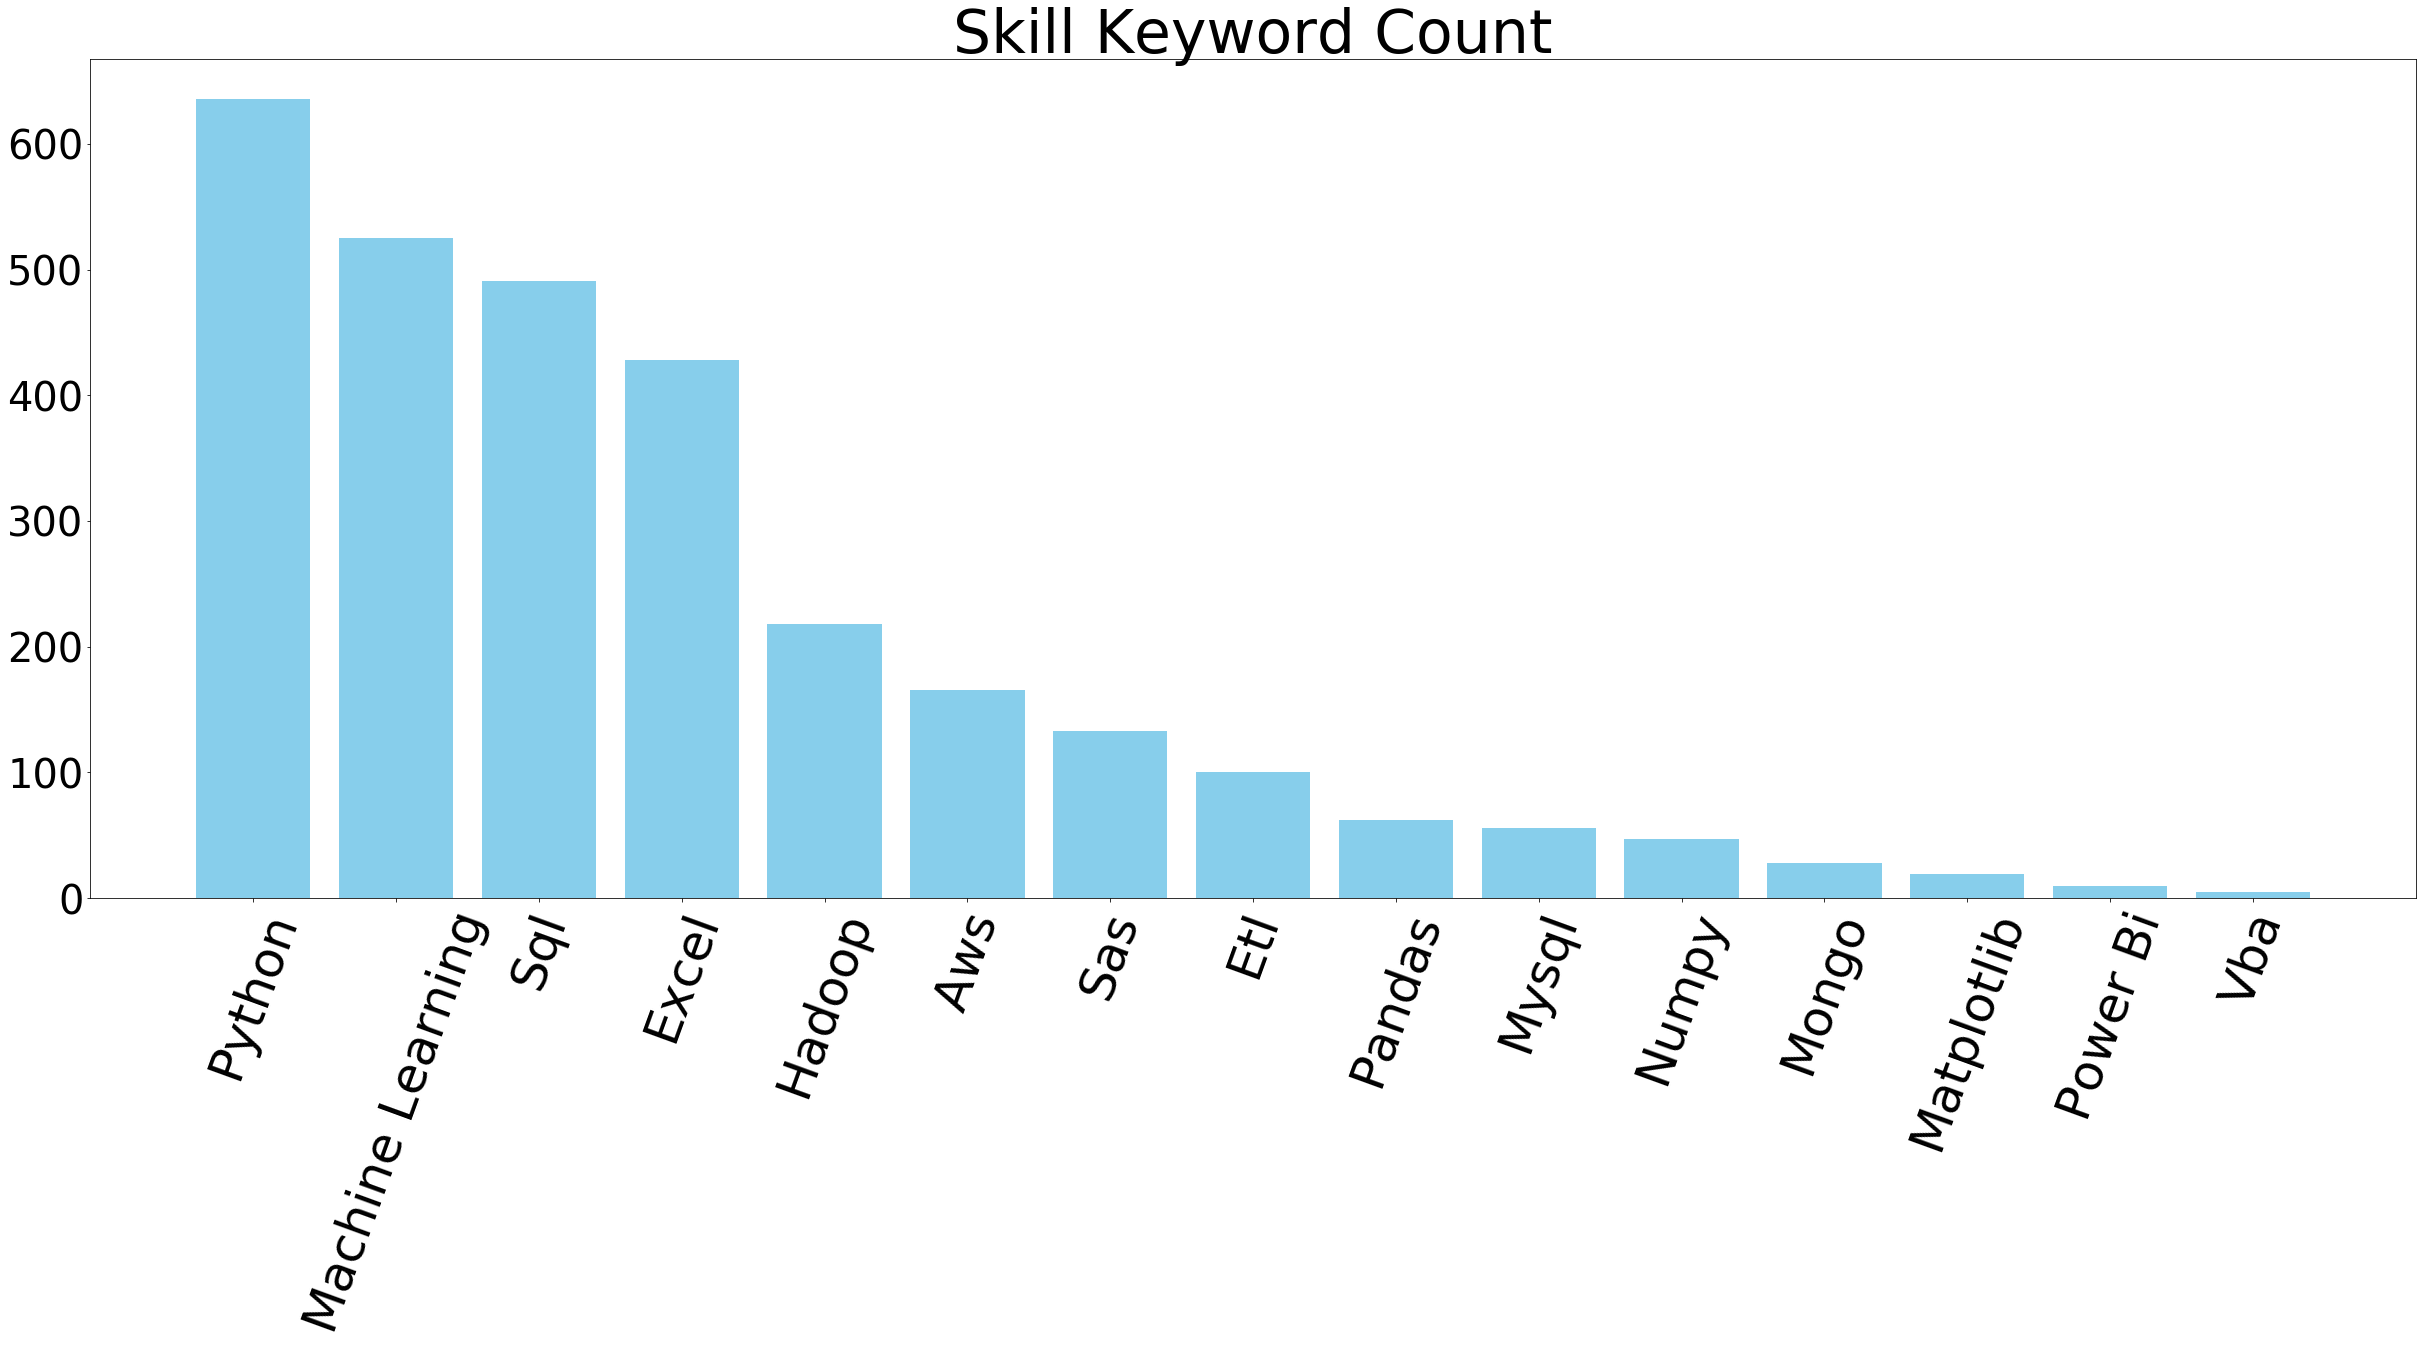

In [33]:
x_axis = np.arange(len(keywords_df_reset))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(35, 20))
plt.title("Skill Keyword Count", fontsize=60)

plt.bar(keywords_df_reset['Keyword'], 
        keywords_df_reset['Count'],
        align='center',
        color='skyblue')

plt.xticks(tick_locations, rotation=70, fontsize=50)
# Make y-axis numbers bigger
plt.rcParams.update({'font.size': 50})

plt.tight_layout()
plt.savefig("Charts/skill_keyword_count.png")

plt.show()

In [27]:
# Job counts by site
count_by_site

Indeed           484
Glassdoor        478
CareerBuilder    163
Monster          131
Name: Site, dtype: int64

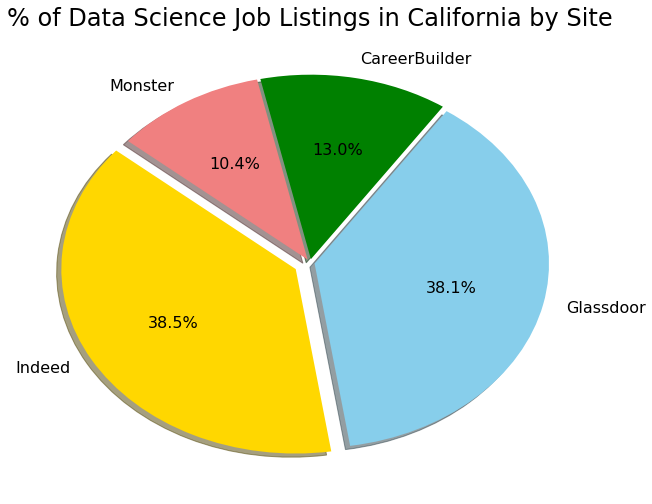

In [28]:
colors = ['gold', 'skyblue', 'green', 'lightcoral']
explode = (0.07, 0.02, 0.02, 0.02)
autopct = "%1.1f%%"

labels = count_by_site.index

plt.figure(figsize=(10,8))
plt.title("% of Data Science Job Listings in California by Site", fontsize=24)
plt.pie(count_by_site, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct=autopct, 
        shadow=True, 
        startangle=140, 
        textprops={'fontsize': 16})

plt.tight_layout()
plt.savefig("Charts/listings_by_site.png")

plt.show()

In [29]:
# Job counts by top 50 city
count_by_city.head(20)

,City,Data Science Jobs,Lat,Lng
0,San Francisco,285,37.7749,-122.419
1,San Diego,73,32.7157,-117.161
2,San Jose,60,37.3382,-121.886
3,Sunnyvale,49,37.3688,-122.036
4,Los Angeles,48,34.0522,-118.244
5,Mountain View,47,37.3861,-122.084
6,Santa Clara,47,37.3541,-121.955
7,Palo Alto,46,37.4419,-122.143
8,Menlo Park,43,37.453,-122.182
9,Redwood City,37,37.4852,-122.236


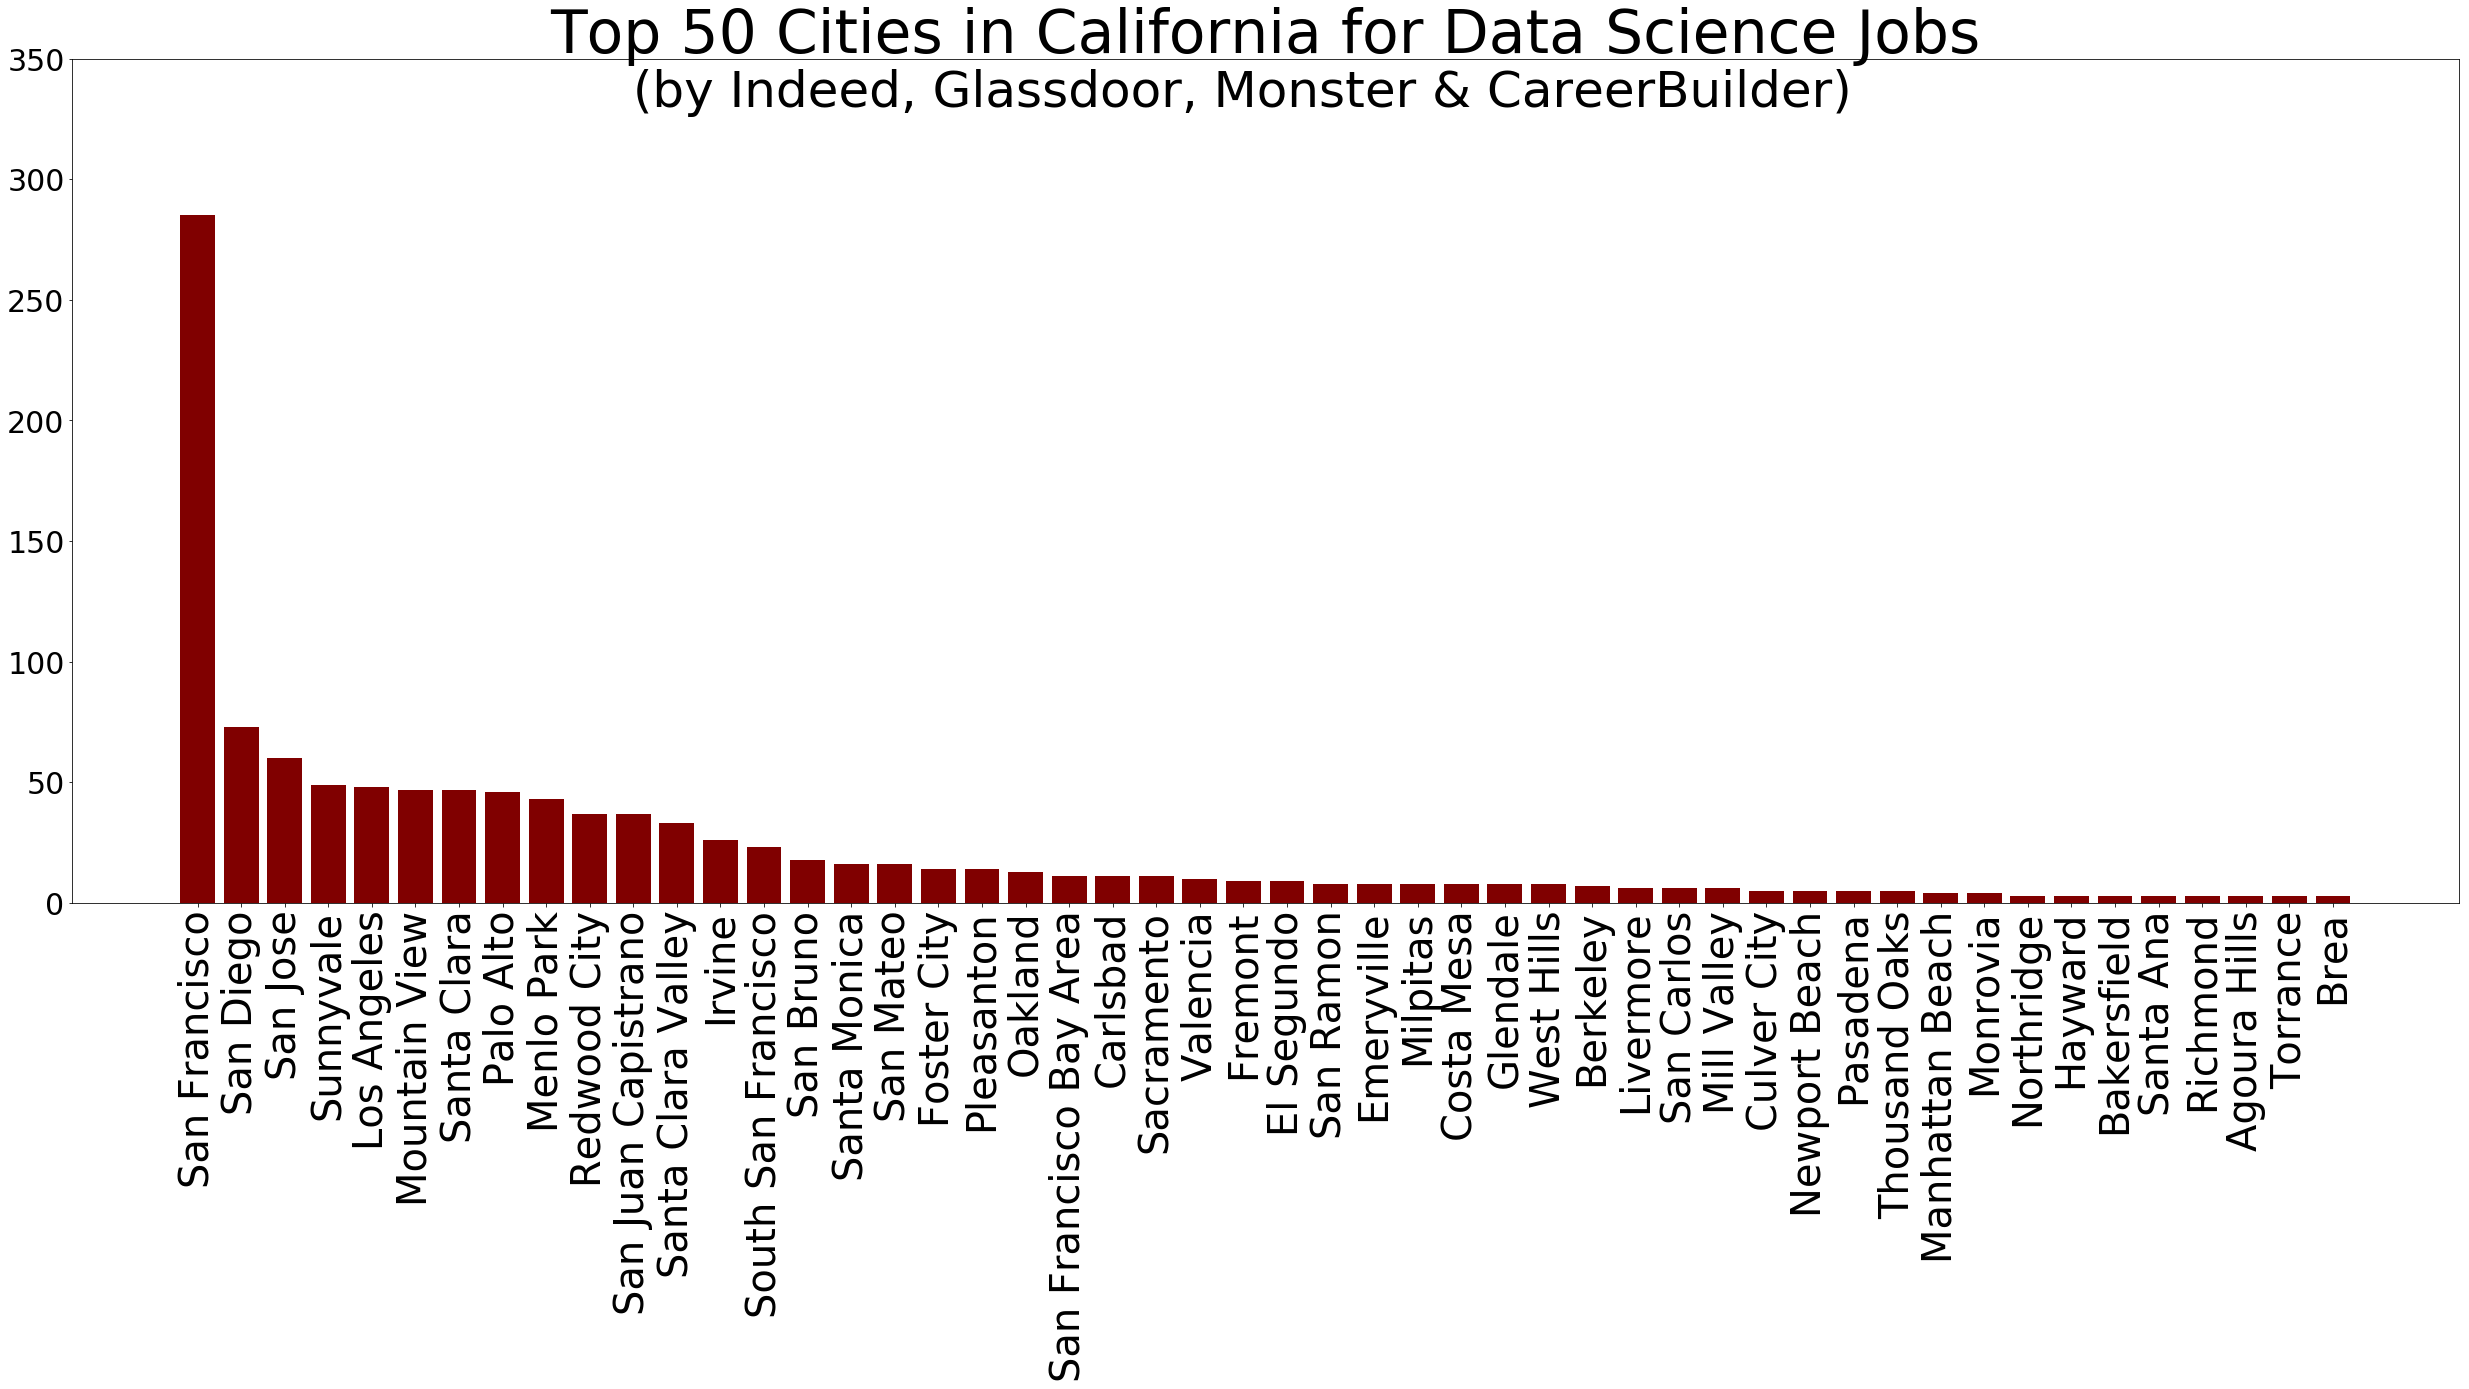

In [45]:
x_axis = np.arange(len(count_by_city.head(50)))
tick_locations = [value for value in x_axis]

# Set figsize
plt.figure(figsize=(35, 20))
# Set fig title
plt.title("Top 50 Cities in California for Data Science Jobs", fontsize=60)
# Set fig subtitle
plt.text(10, 330, "(by Indeed, Glassdoor, Monster & CareerBuilder)", fontsize=50)

# Create bar chart
plt.bar(count_by_city.head(50)['City'], 
        count_by_city.head(50)['Data Science Jobs'],
        align='center', color='maroon')

# Add labels to bars
#for i in range(0, len(tick_locations)):
   # plt.text(tick_locations[i]-0.25, 
            # count_by_city.head(50)['Data Science Jobs'].tolist()[i]+5,
            # count_by_city.head(50)['Data Science Jobs'].tolist()[i],
            # fontsize = 20
            # )


plt.ylim(0, 350)
plt.xticks(tick_locations, rotation=90, fontsize=40)
# Make y-axis numbers bigger
plt.rcParams.update({'font.size': 30})

plt.tight_layout()
plt.savefig("Charts/jobs_by_city")

plt.show()

In [46]:
# Job counts & salary by city
top10_stats

,City,Data Science Jobs,Average Annual Salary (Hi),Average Annual Salary (Low)
0,San Francisco,285,179186.248322,129348.154362
1,San Diego,73,137904.761905,99095.238095
2,San Jose,60,163000.000000,117105.263158
3,Sunnyvale,49,173681.818182,125500.000000
4,Los Angeles,48,135363.636364,98454.545455
5,Mountain View,47,205320.000000,145520.000000
6,Santa Clara,47,171466.666667,125566.666667
7,Palo Alto,46,192812.500000,136812.500000
8,Menlo Park,43,188200.000000,131960.000000
9,Redwood City,37,180333.333333,128000.000000


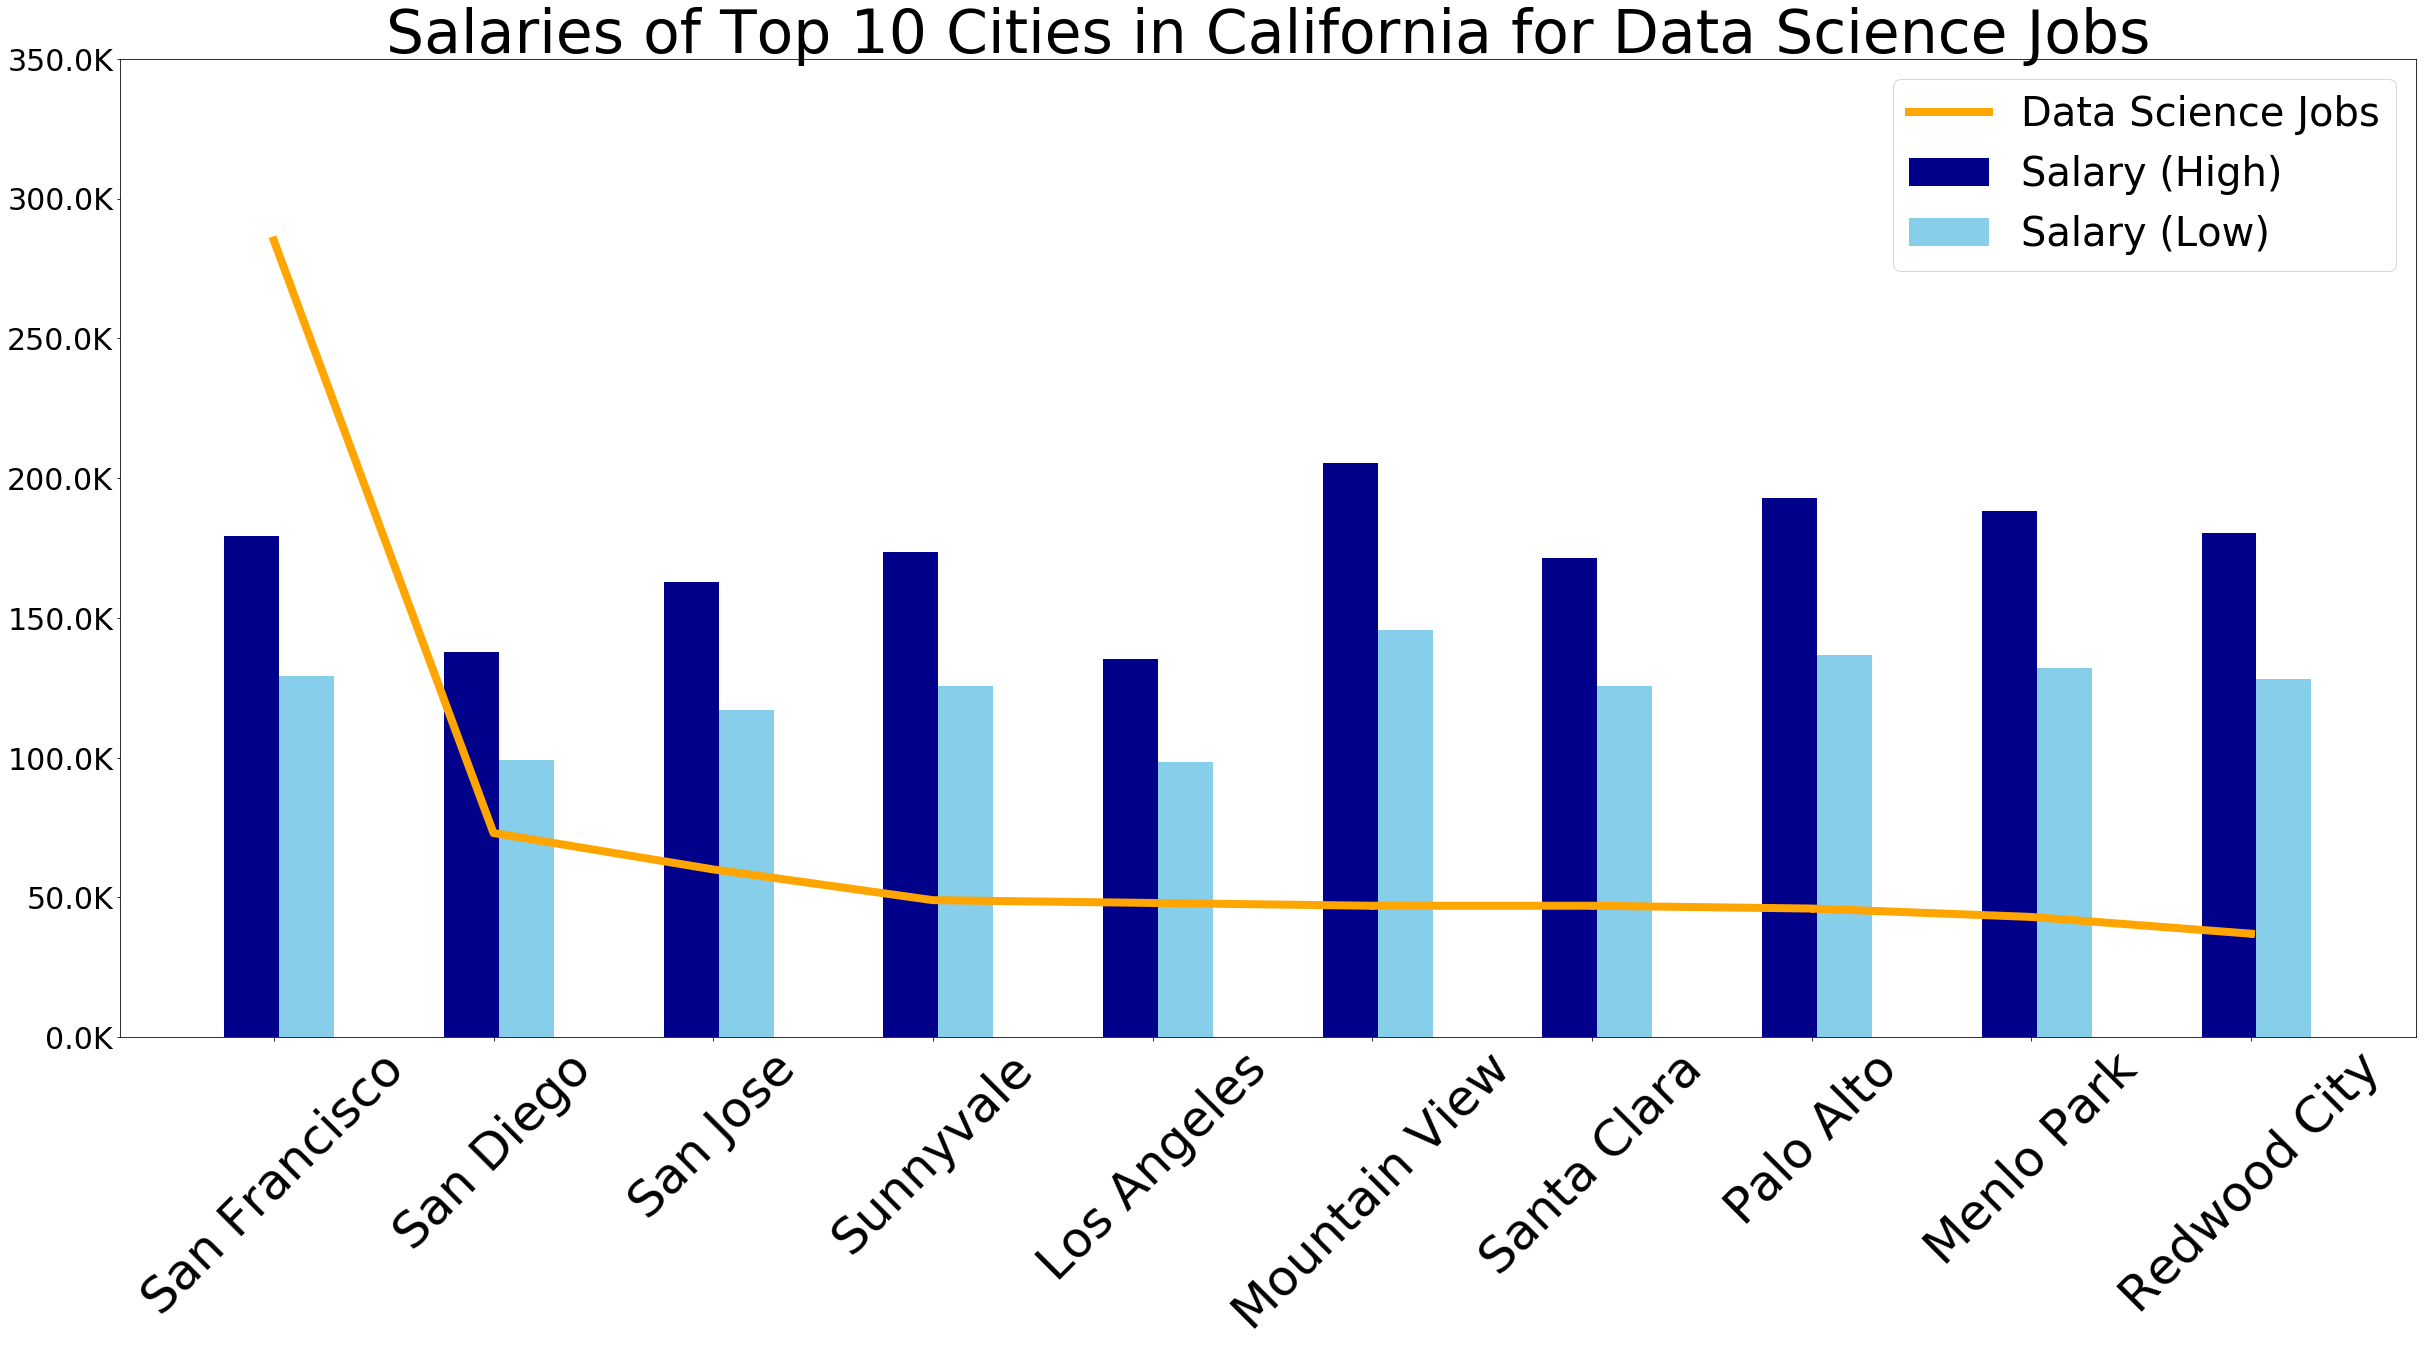

In [47]:
df = top10_stats

# Data
jobs = df['Data Science Jobs']
salary_hi = df['Average Annual Salary (Hi)']/1000
salary_low = df["Average Annual Salary (Low)"]/1000

# number of groups: 1 for each city
x=np.arange(len(jobs))

bar_width = 0.25

# Plot salaries by city
plt.figure(figsize=(35,20))
plt.title("Salaries of Top 10 Cities in California for Data Science Jobs", fontsize=60)



# bar: Salary (Hi)
plt.bar(x, salary_hi, width=bar_width, color="darkblue", zorder=2) 
# label: Salary (Hi)
#for i in range(0, len(salary_hi)):                                 
    # plt.text(x[i]-0.2, salary_hi.tolist()[i]+1, round(salary_hi.tolist()[i], 1), color="darkblue")

# bar: Salary (Low)
plt.bar(x+bar_width, salary_low, width=bar_width, color="skyblue", zorder=2) # bar: Salary (Low)
# label: Salary (Low)
#for i in range(0, len(salary_low)):
   # plt.text(x[i]+bar_width-0.15-0.2, salary_low.tolist()[i]+1, round(salary_low.tolist()[i], 1), color="skyblue")


    
plt.xticks(x+bar_width-0.15, df['City'], rotation=45, fontsize=50)
plt.ylim(0, 350)

# Plot number of jobs as a line plot
plt.plot(x+bar_width-0.15, jobs, color='orange', marker='o', linewidth=8)

plt.legend(["Data Science Jobs", "Salary (High)", "Salary (Low)"], fontsize=40)

# Make x-axis numbers bigger
plt.rcParams.update({'font.size': 50})
plt.gca().set_yticklabels([str(x)+"K" for x in plt.gca().get_yticks()]) 

plt.tight_layout()
plt.savefig("Charts/salaries_by_city.png")

plt.show()

## Loading results into Mongo database

In [ ]:
# Load main DataFrame "job_listings" into Mongo database

In [48]:
# Check to see if DataFrame is empty
len(job_listings)

1256

In [55]:
# Check for columns 
job_listings.columns

Index(['City', 'Company', 'Description', 'Keyword', 'Location', 'Salary',
       'Site', 'State', 'Title', 'URL', 'Unnamed: 0', 'Annual Salary (Hi)',
       'Annual Salary (Low)', 'Hourly Salary (Hi)', 'Hourly Salary (Low)'],
      dtype='object')

In [54]:
# Fill cells with empty string with NaN
for col in job_listings.columns.tolist():
    if type(job_listings[col][0]) == "str":
        job_listings[col] = job_listings[col].str.strip(" ")

In [58]:
# Dependencies
import pymongo

# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Declare the database
db = client.job_listings_db

# Declare the collection
collection = db.data_scientist

# Part I
# A dictionary that represents the document to be inserted

for key, row in job_listings.iterrows():
    
    post = {
    'Company': row['Company'],
    'Title': row['Title'],
    'Location': row['Location'],
    'Description': row['Description'],
    'URL': row['URL'],
    'City': row['City'],
    'State': row['State'],
    'Annual Salary (Hi)': row['Annual Salary (Hi)'],
    'Annual Salary (Low)': row['Annual Salary (Low)'],
    'Hourly Salary (Hi)': row[ 'Hourly Salary (Hi)'],
    'Hourly Salary (Low)': row['Hourly Salary (Low)'],
    'Site': row['Site'],
    'Keyword': row['Keyword'] 
        }
    
    # Insert the document into the database
    # The database and collection, if they don't already exist, will be created at this point.
    collection.insert_one(post)
    
